In [2]:
# import the libraries as shown below
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"dataset1\train",
    seed=123,
    shuffle=True,
    image_size=(224,224),
    batch_size=32
)

Found 1979 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1]


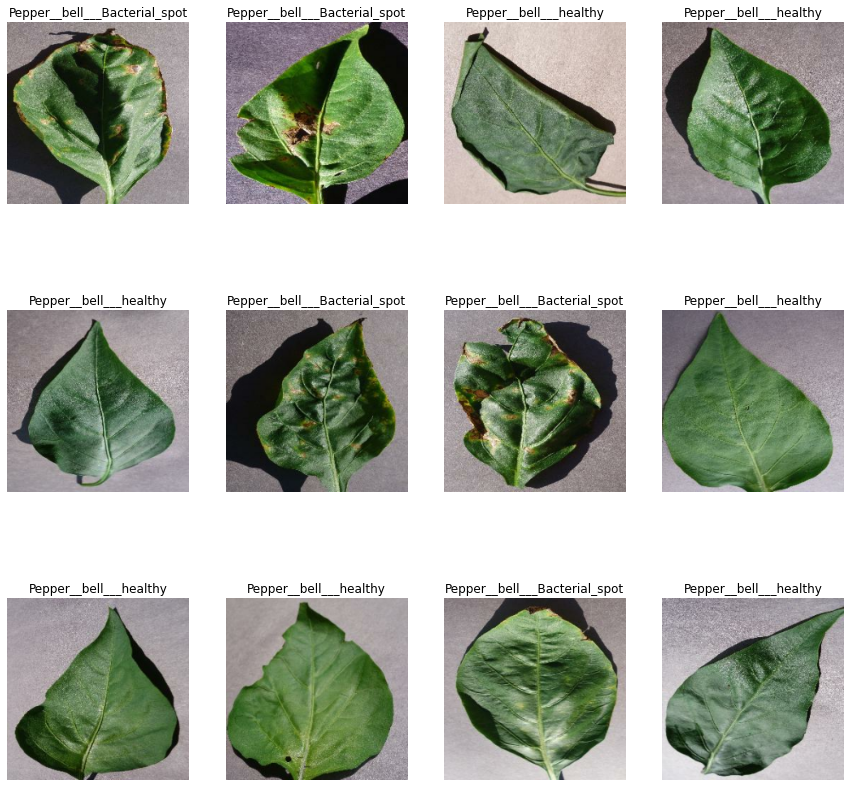

In [6]:
plt.figure(figsize=(15, 15
                   ))
for image_batch, labels_batch in dataset.take(5):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [8]:
train_path =  r"dataset1\train"
valid_path =   r"dataset1\val"

In [10]:
# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 14s 0us/step


In [12]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [13]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

In [14]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
    
)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   zoom_range = 0.2,
                                   rotation_range=10,
                                   horizontal_flip = True)

training_generator = training_datagen.flow_from_directory(  r"dataset1\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')



Found 1979 images belonging to 2 classes.


In [18]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range = 0.3,
        zoom_range = 0.2,
        rotation_range=10,
        horizontal_flip=True)

validation_generator = validation_datagen.flow_from_directory(
        r'dataset1/val',
        target_size=(224,224),
        batch_size=32,
        class_mode="binary"
)

Found 246 images belonging to 2 classes.


In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory( r"dataset1\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 250 images belonging to 2 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_generator,
  validation_data=validation_generator,
  epochs=20,
  steps_per_epoch=len(training_generator),
  validation_steps=len(validation_generator),
  verbose=2
)

Epoch 1/20
62/62 - 84s - loss: 2.2256 - accuracy: 0.6210 - val_loss: 0.7703 - val_accuracy: 0.6098 - 84s/epoch - 1s/step
Epoch 2/20
62/62 - 80s - loss: 0.6503 - accuracy: 0.7302 - val_loss: 0.4466 - val_accuracy: 0.7724 - 80s/epoch - 1s/step
Epoch 3/20
62/62 - 82s - loss: 0.7329 - accuracy: 0.7049 - val_loss: 0.6680 - val_accuracy: 0.6829 - 82s/epoch - 1s/step
Epoch 4/20
62/62 - 84s - loss: 0.5605 - accuracy: 0.7590 - val_loss: 0.6427 - val_accuracy: 0.7317 - 84s/epoch - 1s/step
Epoch 5/20
62/62 - 83s - loss: 0.6311 - accuracy: 0.7362 - val_loss: 0.4166 - val_accuracy: 0.8008 - 83s/epoch - 1s/step
Epoch 6/20
62/62 - 84s - loss: 0.5943 - accuracy: 0.7575 - val_loss: 0.5082 - val_accuracy: 0.7764 - 84s/epoch - 1s/step
Epoch 7/20
62/62 - 83s - loss: 0.4659 - accuracy: 0.8065 - val_loss: 0.3938 - val_accuracy: 0.7805 - 83s/epoch - 1s/step
Epoch 8/20
62/62 - 84s - loss: 0.4538 - accuracy: 0.8034 - val_loss: 0.5834 - val_accuracy: 0.7398 - 84s/epoch - 1s/step
Epoch 9/20
62/62 - 84s - loss: 0

In [21]:
scores = model.evaluate(test_set)

8/8 [==============================] - 9s 1s/step - loss: 1.2351 - accuracy: 0.7040


In [22]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

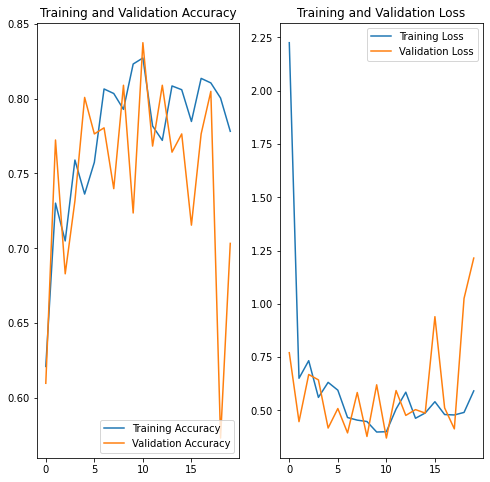

In [23]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 64ms/step


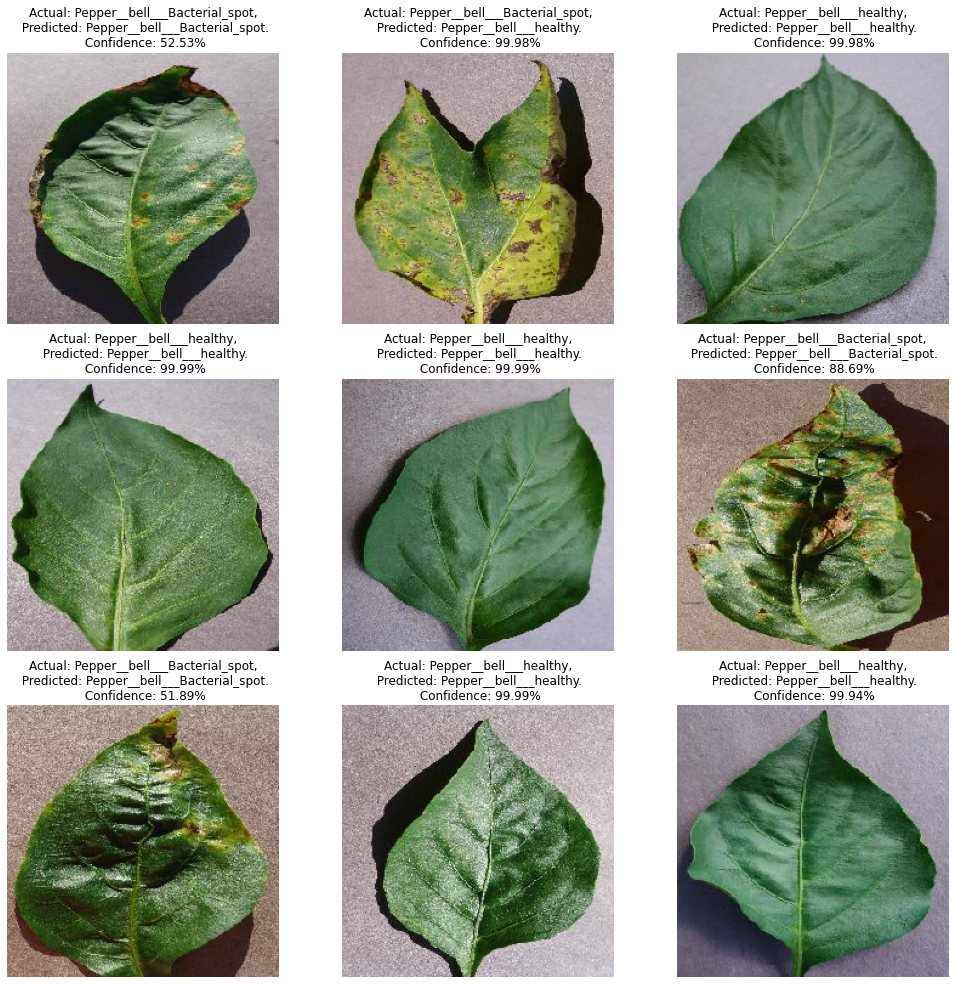

In [27]:
plt.figure(figsize=(17, 17))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break